Customer ID: Unique identifier for each customer.

Age: Age of the customer (numeric)

Gender: Gender of the customer (Male or Female)

Loyalty Member: (Yes/No) (Values change by time, so pay attention to who cancelled and who signed up)

***Product Type***: Type of electronic product sold (e.g., Smartphone, Laptop, Tablet)

SKU: a unique code for each product.

Rating: Customer rating of the product (1-5 stars) (Should have no Null Ratings)

Order Status: Status of the order (Completed, Cancelled)

**Payment Method**: Method used for payment (e.g., Cash, Credit Card, Paypal)

**Total Price**: Total price of the transaction (numeric)

Unit Price: Price per unit of the product (numeric)

Quantity: Number of units purchased (numeric)

***Purchase Date***: Date of the purchase (format: YYYY-MM-DD)

***Shipping Type***: Type of shipping chosen (e.g., Standard, Overnight, Express)

Add-ons Purchased: List of any additional items purchased (e.g., Accessories, Extended Warranty)

**Add-on Total**: Total price of add-ons purchased (numeric)

**Задание 1**

На основании датасета для каждого покупателя получите:
* предпочитаемый метод оплаты;
* общие траты;
* количество денег, потраченных на дополнительные услуги и аксессуары.


In [1]:
import pandas as pd
import seaborn as sns

DataSet = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')

In [2]:
DataSet[:10]

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
5,1004,41,Female,No,Smartphone,SKU1001,5,Completed,Credit Card,83.00,20.75,4,2024-05-26,Standard,"Impulse Item,Accessory",65.78
6,1005,25,Female,No,Smartwatch,SKU1003,3,Completed,Paypal,7603.47,844.83,9,2024-01-30,Overnight,NaN,0.00
7,1005,25,Female,No,Laptop,SKU1005,3,Completed,Debit Card,4175.64,463.96,9,2024-06-24,Overnight,"Extended Warranty,Extended Warranty",75.33
8,1006,24,Male,No,Smartphone,SKU1004,2,Cancelled,Debit Card,5538.33,791.19,7,2023-10-03,Standard,Impulse Item,43.05
9,1006,24,Male,Yes,Laptop,SKU1005,3,Completed,Cash,4175.64,463.96,9,2024-01-01,Express,NaN,0.00


In [3]:
DataGroupPayment = DataSet.groupby('Customer ID')['Payment Method']

In [4]:
DataGroupPayment.value_counts()

Customer ID  Payment Method
1000         Credit Card       1
             Paypal            1
1002         Cash              1
             Credit Card       1
1003         Cash              1
                              ..
19996        Bank Transfer     2
             Credit Card       2
             PayPal            2
19997        Bank Transfer     1
19998        Bank Transfer     1
Name: count, Length: 17151, dtype: int64

In [5]:
DataGroupTotalPrice = DataSet.groupby('Customer ID')['Total Price'].sum()

In [6]:
DataGroupTotalPrice

,Total Price
Customer ID,
1000,6279.42
1002,5020.60
1003,41.50
1004,83.00
1005,11779.11
...,...
19994,5504.87
19995,5394.56
19996,27296.78


In [7]:
DataGroupTotalAdd = DataSet.groupby('Customer ID')['Add-on Total'].sum()

In [8]:
DataGroupTotalAdd

,Add-on Total
Customer ID,
1000,66.30
1002,60.16
1003,35.56
1004,65.78
1005,75.33
...,...
19994,93.17
19995,0.00
19996,432.12


**Задание 2**

1. На основании датасета получите доход:
    * по каждому методу доставки,
    * по каждому типу продукта,
    * по дополнительным услугам за каждый месяц,
    * по дополнительным услугам за каждый квартал.
2. Отобразите полученные данные на графике


In [9]:
DataSet[DataSet['Order Status'] == 'Completed']

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
5,1004,41,Female,No,Smartphone,SKU1001,5,Completed,Credit Card,83.00,20.75,4,2024-05-26,Standard,"Impulse Item,Accessory",65.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19991,19995,69,Female,Yes,Laptop,LTP123,3,Completed,Credit Card,5394.56,674.32,8,2024-08-09,Same Day,NaN,0.00
19994,19996,27,Female,No,Smartphone,SMP234,5,Completed,Credit Card,3419.04,1139.68,3,2024-04-20,Same Day,NaN,0.00
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98


In [22]:
DataSet['Total Amount'] = DataSet['Total Price'] + DataSet['Add-on Total']
DataGroupShippingType = DataSet[DataSet['Order Status'] == 'Completed'].groupby('Shipping Type')['Total Amount'].sum()

In [23]:
DataGroupShippingType

,Total Amount
Shipping Type,
Expedited,8610437.09
Express,5725863.77
Overnight,5982983.40
Same Day,8469574.60
Standard,14676351.95


<Axes: xlabel='Shipping Type', ylabel='Total Amount'>

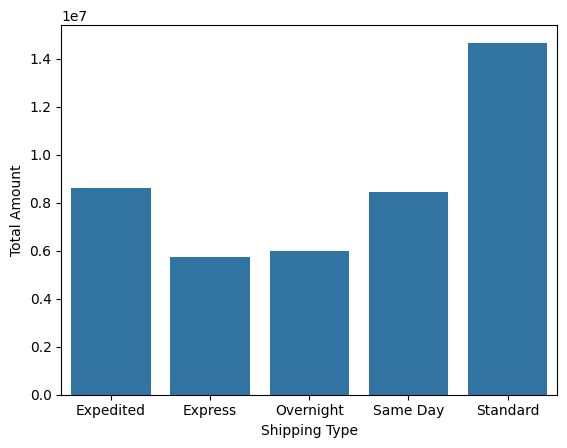

In [24]:
sns.barplot(DataGroupShippingType)

In [25]:
DataGroupProductType = DataSet[DataSet['Order Status'] == 'Completed'].groupby('Product Type')['Total Price'].sum()

In [26]:
DataGroupProductType

,Total Price
Product Type,
Headphones,2734651.00
Laptop,8365905.25
Smartphone,14407835.84
Smartwatch,9398591.23
Tablet,7722632.25


<Axes: xlabel='Product Type', ylabel='Total Price'>

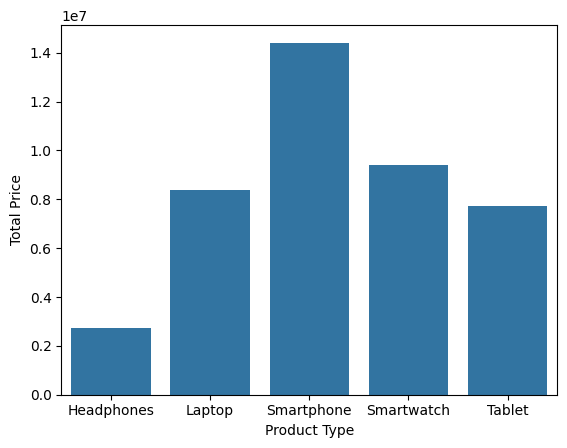

In [27]:
sns.barplot(DataGroupProductType)

In [28]:
DataSet['Month'] = pd.to_datetime(DataSet['Purchase Date']).dt.month
DataGroupMonth = DataSet[DataSet['Order Status'] == 'Completed'].groupby('Month')['Total Amount'].sum()

In [29]:
DataGroupMonth

,Total Amount
Month,
1,4609532.76
2,3977503.88
3,4310840.58
4,4382617.75
5,4552289.38
6,4550643.31
7,4549758.03
8,4466294.21
9,3736908.91


<Axes: xlabel='Month', ylabel='Total Amount'>

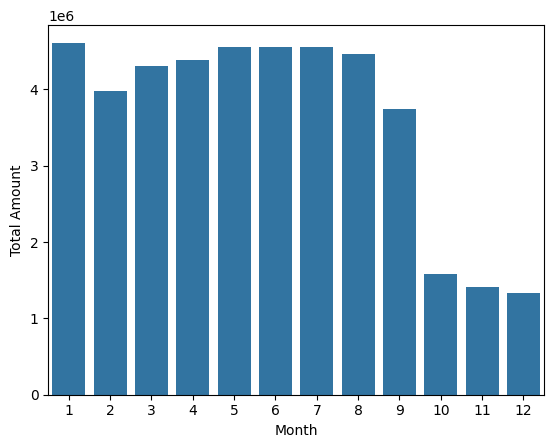

In [30]:
sns.barplot(DataGroupMonth)

In [31]:
DataSet['Month Cvartal'] = pd.to_datetime(DataSet['Purchase Date']).dt.quarter
DataGroupMonthCvartal = DataSet[DataSet['Order Status'] == 'Completed'].groupby('Month Cvartal')['Total Amount'].sum()

In [32]:
DataGroupMonthCvartal

,Total Amount
Month Cvartal,
1,12897877.22
2,13485550.44
3,12752961.15
4,4328822.00


<Axes: xlabel='Month Cvartal', ylabel='Total Amount'>

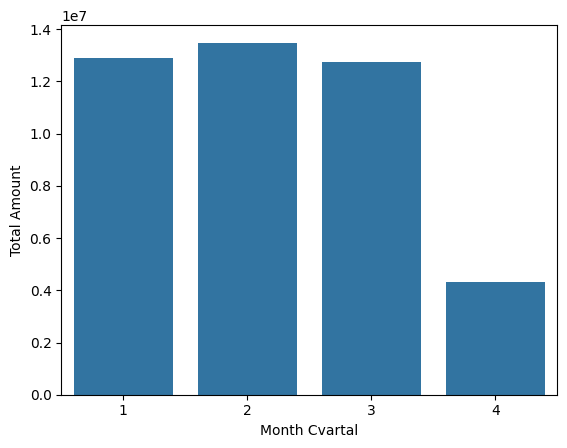

In [33]:
sns.barplot(DataGroupMonthCvartal)